# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [407]:
# Import the appropriate libraries with aliases
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import style
plt.style.use("seaborn-v0_8-bright")

# Create two new dataframesC:\Users\apr09\OneDrive\Desktop\LaunchCode\Codes\Assignments\Assignment 2 Call Center Cleanup\Call_center_Assignment2
north_df = pd.read_csv("C:\\Users\\apr09\\OneDrive\\Desktop\\LaunchCode\\Codes\\Assignments\\Assignment 2 Call Center Cleanup\\Call_center_Assignment2\\NorthCallCenter.csv")
south_df = pd.read_csv("C:\\Users\\apr09\\OneDrive\\Desktop\\LaunchCode\\Codes\\Assignments\\Assignment 2 Call Center Cleanup\\Call_center_Assignment2\\SouthCallCenter.csv")

In [425]:
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [426]:
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [428]:
#Code Used:
north_rep = len(pd.unique(north_df["Rep ID"]))
north_rep

9

#### EDA Question 1B:  How many reps are in the South branch?  

In [429]:
#Code Used:
south_rep = len(pd.unique(south_df["Rep ID"]))
south_rep

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [430]:
#Code Used:
#Busy Minutes Average
north_busy_min = north_df["Busy Minutes"]
north_busy_min.agg("mean")

9.987755102040817

In [431]:
#Not Ready  Minutes Average
north_not_ready_min = north_df["Not Ready Minutes"]
north_not_ready_min.agg("mean")

1.9142857142857144

In [432]:
#Incoming Wait Time Average
north_incoming_wait = north_df["Incoming Wait Time"]
north_incoming_wait.agg("mean")

3.048780487804877

In [433]:
#During Call Wait Time Average
north_during_wait = north_df["During Call Wait Time"]
north_during_wait.agg("mean")

2.9673469387755103

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [434]:
#Code Used:
#Busy Minutes Average
south_busy_min = south_df["Busy Minutes"]
south_busy_min.agg("mean")

10.054140127388536

In [435]:
#Not Ready  Minutes Average
south_not_ready_min = south_df["Not Ready Minutes"]
south_not_ready_min.agg("mean")

1.910828025477707

In [436]:
#Incoming Wait Time Average
south_incoming_wait = south_df["Incoming Wait Time"]
south_incoming_wait.agg("mean")

3.0

In [438]:
#During Call Wait Time Average
south_during_wait = south_df["During Call Wait Time"]
south_during_wait.agg("mean")

3.0764331210191083

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [445]:
# Code Used:
both_df = pd.concat([north_df, south_df])
both_df["Time Block"].value_counts()

12:00 PM    120
10:00 AM     99
3:00 PM      73
2:00 PM      65
11:00 AM     56
4:00 PM      53
5:00 PM      43
1:00 PM      40
9:00 AM      10
Name: Time Block, dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91 
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



In [1040]:
#Searching for number of calls per call purpose for each branch (chart below: 1 - under visualization section)
purpose_group10 = df.groupby("Call Purpose")
purpose_counts10 = purpose_group10["Branch"].value_counts()

complaints2 = purpose_counts10["Complaint"].to_dict()
sales_support2 = purpose_counts10["Sales Support"].to_dict()
product_support2 = purpose_counts10["Product Support"].to_dict()

com_cts2 = pd.DataFrame(complaints2, index=["Complaints"])
sales_cts2 = pd.DataFrame(sales_support2, index=["Sales Support"])
product_cts2 = pd.DataFrame(product_support2, index=["Product Support"])

call_cts5 = pd.concat([com_cts2, sales_cts2, product_cts2], axis=0)
call_cts5

,South,North
Complaints,36,15
Sales Support,113,85
Product Support,165,145


In [448]:
#Trying to see which queues North receives
queues_n = north_df["Queue"].value_counts()
queues_n

B    149
A     96
Name: Queue, dtype: int64

In [449]:
#Trying to see which queues South receives
queues_s = south_df["Queue"].value_counts()
queues_s

D    176
C    138
Name: Queue, dtype: int64

In [1038]:
#Searching for number of calls per purpose per queue (chart below: 2 - under visualization section)
purpose_group1 = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purp_que = purpose_group1["Queue"].value_counts()

complaints1 = purp_que["Complaint"].to_dict()
sales_support1 = purp_que["Sales Support"].to_dict()
product_support1 = purp_que["Product Support"].to_dict()

com_cts1 = pd.DataFrame(complaints1, index=["Complaints"])
sales_cts1 = pd.DataFrame(sales_support1, index=["Sales Support"])
product_cts1 = pd.DataFrame(product_support1, index=["Product Support"])

que_purp10 = pd.concat([com_cts1, sales_cts1, product_cts1], axis=0)
que_purp10

,D,C,B,A
Complaints,22,14,8,7
Sales Support,64,49,53,32
Product Support,90,75,88,57


In [1022]:
#Searching for incoming vs outgoing totals for each branch (chart below: 3 - under visualization section)
call_type = df.groupby("Branch")
branch10 = ["North", "South"]
type_ct = call_type["Incoming or Outgoing"].value_counts()

north_dict = type_ct["North"].to_dict()
south_dict = type_ct["South"].to_dict()

n_ct = pd.DataFrame(north_dict, index=["North"])
s_ct = pd.DataFrame(south_dict, index=["South"])

n_s_df = pd.concat([n_ct, s_ct])
n_s_df

,Outgoing,Incoming
North,163,82
South,188,126


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: There is missing data in the Incoming Wait Time for both the North and South datasets. I would used the mean method to impute the data since the Incoming Call column is needed and cannot be dropped and to delete the occurances only would deleted most of the data. The mean was the most middle point of the data. 

<AxesSubplot: >

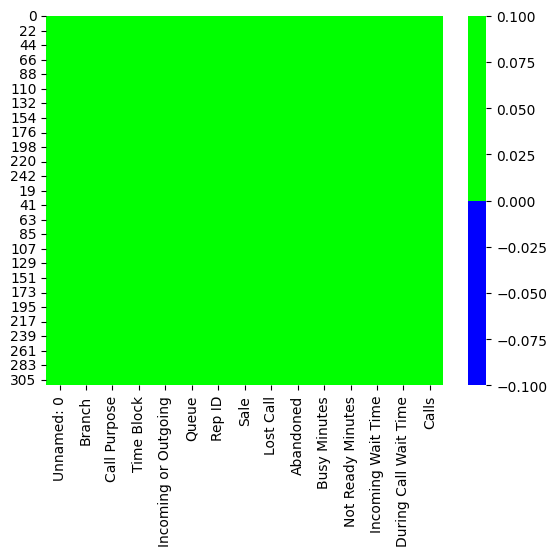

In [412]:
# Code Used
# Add Additional Cells as needed. 
## Visual shows correct information after running it again once imputing was completed
cols = both_df.columns[:30]
colors = ['blue', 'lime']
sns.heatmap(both_df[cols].isnull(), cmap=sns.color_palette(colors))

In [413]:
#Checking for percentage of missing data
##Confirmed no missing data was found after imputing data
for col in both_df.columns:
    pct_missing = np.mean(both_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 0%
During Call Wait Time - 0%
Calls - 0%


In [401]:
#Determining best option for imputing the missing data
north_df["Incoming Wait Time"].describe()

count    245.000000
mean       3.048780
std        0.839118
min        1.000000
25%        3.048780
50%        3.048780
75%        3.048780
max        5.000000
Name: Incoming Wait Time, dtype: float64

In [455]:
#Imputing mean for North data only
mean_north = north_df['Incoming Wait Time'].mean()
print(mean_north)
north_df['Incoming Wait Time'] = north_df['Incoming Wait Time'].fillna(mean_north)
north_df

3.048780487804877


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.00000,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.00000,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.00000,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.00000,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.00000,4,1
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.00000,2,1
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.00000,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.00000,3,1
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.00000,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.00000,4,1


In [417]:
#Imputing mean for South data only
mean_south = south_df['Incoming Wait Time'].mean()
print(mean_south)
south_df['Incoming Wait Time'] = south_df['Incoming Wait Time'].fillna(mean_south)
south_df

3.0


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
5,5,South,Sales Support,1:00 PM,Incoming,D,Karl,NO,0,0,9,1,1.0,4,1
6,6,South,Product Support,11:00 AM,Incoming,C,Sandy,NO,0,0,8,1,1.0,2,1
7,7,South,Product Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,1,1.0,3,1
8,8,South,Product Support,2:00 PM,Incoming,D,Randy,NO,0,0,11,2,1.0,4,1
9,9,South,Product Support,3:00 PM,Incoming,D,George,NO,0,0,8,3,1.0,4,1


In [419]:
#Imputing mean for both, for when using combined dataframes
mean_both = both_df['Incoming Wait Time'].mean()
print(mean_both)
both_df['Incoming Wait Time'] = both_df['Incoming Wait Time'].fillna(mean_both)
both_df

3.0213796413456087


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.00000,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.00000,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.00000,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.00000,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.00000,4,1
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.00000,2,1
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.00000,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.00000,3,1
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.00000,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.00000,4,1


#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: I would rectify this because it would cause issues with calculation. This correction would be made by determining what is causing the values to be seen as different in pandas. For this dataset, I used the strip syntax to remove the space(s) that was causing the duplication.

In [456]:
#Code Used
# Add Additional Cells as needed.
#Determining and correcting if separate values are due to spaces
north_df['Sale'] = north_df['Sale'].str.strip()
sorted_sale = north_df.groupby(["Sale"])
sorted_sale.first()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Sale,,,,,,,,,,,,,,
NO,0,North,Complaint,9:00 AM,Incoming,B,Brent,0,1,9,2,1.0,4,1
YES,19,North,Sales Support,10:00 AM,Incoming,B,Lilly,0,0,11,2,2.0,4,1


#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: No, there is not any duplicate data in the two sets.If there were I would remove the duplicates by using drop_duplicates().

In [457]:
#Code Used
# Add Additional Cells as needed.
df_dup = both_df[both_df.duplicated()]
df_dup

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: The only column that could be conisdered unnecessary would be the Unnamed column but I did find that in my own analysis this column could be used as a fixed index for the data. 

In [458]:
#Code Used
# Add Additional Cells as needed
both_df1 = both_df.drop(columns="Unnamed: 0")
both_df1

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.00000,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.00000,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.00000,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.00000,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.00000,4,1
5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.00000,2,1
6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.00000,3,1
7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.00000,3,1
8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.00000,4,1
9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.00000,4,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [459]:
# Create dataframe for the entire company named df
## Append allowed me to get all of rows from both columns, concat was only allowing 313
df = north_df.append(south_df, ignore_index=True)
df

C:\Users\apr09\AppData\Local\Temp\ipykernel_17036\2595623079.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = north_df.append(south_df, ignore_index=True)


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.00000,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.00000,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.00000,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.00000,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.00000,4,1
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.00000,2,1
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.00000,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.00000,3,1
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.00000,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.00000,4,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent - 37
- South Branch = Eric - 35


In [462]:
# Code Used
# Add Additional Cells as needed.

col = ["Unnamed: 0", "Lost Call", "Abandoned", "Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time", "Calls"]
rep_gr = df.groupby(["Rep ID", "Branch"]).agg("sum")
rep_sort = rep_gr.sort_values(by=['Calls'])
rep_sort

C:\Users\apr09\AppData\Local\Temp\ipykernel_17036\2241476763.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rep_gr = df.groupby(["Rep ID", "Branch"]).agg("sum")


,,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,Branch,,,,,,,,
Alice,South,3637,0,0,199,46,57.000000,58,20
Amanda,North,2666,0,1,229,43,66.878049,60,23
Andy,North,2494,0,3,228,43,75.634146,65,23
Cam,North,2746,1,0,233,46,71.634146,66,24
Xander,North,3340,1,0,244,44,74.878049,68,24
Sharon,South,4226,1,1,257,38,80.000000,77,25
Josh,South,3960,3,0,260,50,82.000000,83,26
Susan,South,4006,2,0,267,53,77.000000,88,26
Joe,North,3178,0,0,256,49,84.780488,81,26


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 0.03
- South Branch = 0.01
- Company Wide = 0.02
- Do any of these fall out of the optimal range of 2-5%? Yes, both the North and South are above the optimal range for abandoned calls.

In [463]:
# Code Used
# Add Additional Cells as needed.

#Mean for each center
branch_gr = df.groupby("Branch")["Abandoned"].mean()
branch_gr


Branch
North    0.028571
South    0.012739
Name: Abandoned, dtype: float64

In [464]:
#Mean of both centers
all_mean = df["Abandoned"].mean()
all_mean

0.01967799642218247

In [32]:
#Calculating optimal range of both centers mean
for r in branch_gr:
    if r is (r <= (0.02 * all_mean)) or ((0.05 * all_mean) <= r):
        print(True)
    else:
        print(False)

True
True


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch =  13% / 245 Calls
- South Branch =  15% / 314 Calls
- Company Wide = 14% / 559 Calls

In [465]:
# Code Used
# Add Additional Cells as needed.

#Total Calls
wait_time = {}
branches = ["North", "South"]
branch_calls = df.groupby("Branch")[["Incoming Wait Time", "Calls"]].apply(sum)

branch_calls


,Incoming Wait Time,Calls
Branch,,
North,746.95122,245.0
South,942.00000,314.0


In [34]:
#df for essential columns in North 
kpi_n = north_df[['Incoming Wait Time','Calls']].copy()

#Calls answered in less than 2 secs
service_calls = kpi_n[kpi_n["Incoming Wait Time"] <= 2.0]

#Percentage of all calls answered in 2 secs
service_north = [service_calls.count() / kpi_n["Calls"].count() * 100]
service_north

[Incoming Wait Time    13.469388
 Calls                 13.469388
 dtype: float64]

In [35]:
#df for essential columns in South
kpi_s = south_df[['Incoming Wait Time','Calls']].copy()

#Calls answered in less than 2 secs
service_calls_s = kpi_s[kpi_s["Incoming Wait Time"] <= 2.0]

#Percentage of all calls answered in 2 secs
service_south = [service_calls_s.count() / kpi_s["Calls"].count() * 100]
service_south

[Incoming Wait Time    15.286624
 Calls                 15.286624
 dtype: float64]

In [466]:
#Total Calls for both
total_calls = df[["Calls"]].count()
total_calls

Calls    559
dtype: int64

In [467]:
#df for essential columns in all
kpi_service_b = df[['Incoming Wait Time','Calls']].copy()

#Calls answered in less than 2 secs
service_calls_b = kpi_service_b[kpi_service_b["Incoming Wait Time"] <= 2.0]

#Percentage of all calls answered in 2 secs
service_both = [service_calls_b.count() / kpi_service_b["Calls"].count() * 100]
service_both

[Incoming Wait Time    14.490161
 Calls                 14.490161
 dtype: float64]

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.04
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.01


In [38]:
# Code Used 
#Average Speed of North
wait_sum_n = kpi_n[["Incoming Wait Time", "Calls"]].apply(sum)

answer_north = [wait_sum_n["Incoming Wait Time"] / wait_sum_n["Calls"]]
answer_north

[3.0487804878048683]

In [39]:
#Average Speed of South
wait_sum_s = kpi_s[["Incoming Wait Time", "Calls"]].apply(sum)

answer_south = [wait_sum_s["Incoming Wait Time"] / wait_sum_s["Calls"]]
answer_south

[3.0]

In [468]:
#Average Speed of Both
wait_sum_b = df[["Incoming Wait Time", "Calls"]].apply(sum)

answer_both = [wait_sum_b["Incoming Wait Time"] / wait_sum_b["Calls"]]
answer_both

[3.0213796413456047]

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose the bar chart so that I can compare the categorical data- the four queues. This will allow the viewer to see the differences in each queue more easily.

C:\Users\apr09\AppData\Local\Temp\ipykernel_17036\1040263001.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_dict = df.groupby("Queue").agg("sum")


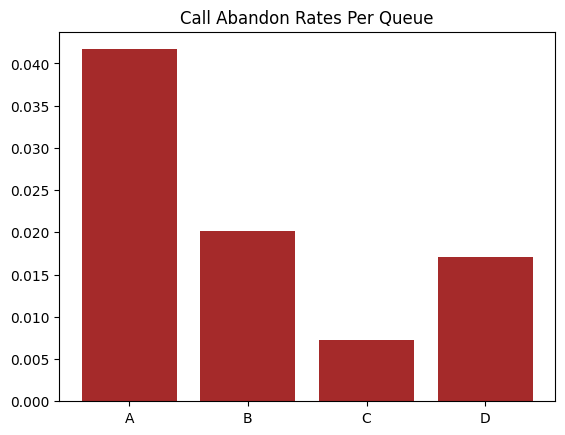

In [41]:
# Create visualization 1 here
# Import any additional libraries needed with alias

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
calc = queue_dict["Abandoned"] / queue_dict["Calls"]

# queue_dict
for i in range(4):
    abandonment_rates[queues[i]] = calc[i]
    
abandonment_rates

#Pre-coded- Errors
# for i in range(4):
#     abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your Code Here:

queue= list(abandonment_rates.keys())
abandon_rate = list(abandonment_rates.values())


plt.bar(*zip(*abandonment_rates.items()), color="brown")
plt.title("Call Abandon Rates Per Queue")
plt.savefig('barchart.png')
plt.show()

In [43]:
abandonment_rates

{'A': 0.041666666666666664,
 'B': 0.020134228187919462,
 'C': 0.007246376811594203,
 'D': 0.017045454545454544}

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I used a stacked bar chart for table 1 and 2 so that the number of calls answered within 2 seconds could be seen against the total number of calls for each rep. I selected the lollipop chart for table 3 so that the percentage could be emphasized for each representative.

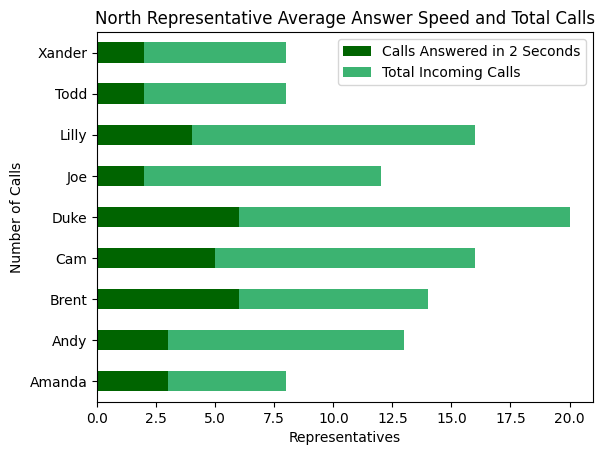

In [44]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table
# print(quick_stats)

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table
# print(total_stats)

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
# print(service_level)



#Your Code Here:
#Coding Dataframe for Table 1 and 2
totals_rep = pd.concat([quick_stats, total_stats], axis=1)
totals_rep.columns = ['Calls Answered in 2 Seconds', 'Total Incoming Calls']
# totals_rep

#Table 1 and 2 Chart
colors_1 = ['darkgreen', 'mediumseagreen']

totals_rep.plot.barh(stacked=True, color=colors_1)
plt.title("North Representative Average Answer Speed and Total Calls")
plt.xlabel("Representatives")
plt.ylabel("Number of Calls")
plt.savefig('stackedbarh.png')

In [469]:
#Coding DataFrame for Table 3
service_lvl = pd.DataFrame(service_level)
service_lvl.drop(columns=["Calls_x", "Calls_y"])

,Service Level %
Rep ID,
Amanda,60.000000
Andy,30.000000
Brent,75.000000
Cam,45.454545
Duke,42.857143
Joe,20.000000
Lilly,33.333333
Todd,33.333333
Xander,33.333333


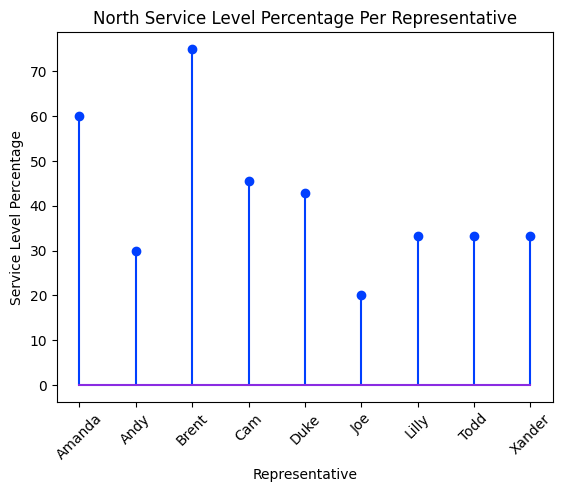

In [470]:
#Chart for Table 3
plt.stem(service_lvl.index, service_lvl['Service Level %'])
plt.title('North Service Level Percentage Per Representative')
plt.xticks(rotation=45)
plt.xlabel('Representative')
plt.ylabel('Service Level Percentage')
plt.savefig('lollipop.png')
plt.show()

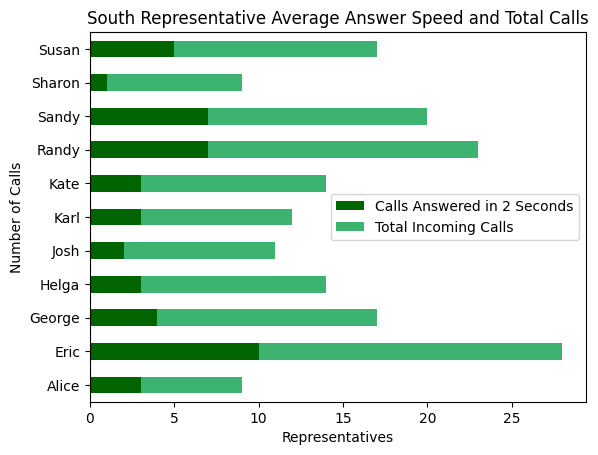

In [47]:
#South Coding
south_plt = south_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls_1 = south_df[south_df["Incoming Wait Time"] <= 2.0]
quick_reps_1 = quick_calls_1[["Rep ID", "Calls"]]
quick_stats_1 = quick_reps_1.groupby(["Rep ID"]).sum()  # Final Table
# print(quick_stats)

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in_1 = south_df[south_df["Incoming or Outgoing"] == "Incoming"]
rep_calls_1 = total_calls_in_1[["Rep ID", "Calls"]]     
total_stats_1 = rep_calls_1.groupby(["Rep ID"]).sum() # Final Table
# print(total_stats)

#  Table 3: Service Level Percentage created via merge
service_level_1 = pd.merge(quick_stats_1, total_stats_1, on="Rep ID")

# Create Percentage Column in Table 3
service_level_1["Service Level %"] = service_level_1["Calls_x"]/service_level_1["Calls_y"] * 100
# print(service_level)



#Your Code Here:
#Coding Dataframe for Table 1 and 2
totals_rep_1 = pd.concat([quick_stats_1, total_stats_1], axis=1)
totals_rep_1.columns = ['Calls Answered in 2 Seconds', 'Total Incoming Calls']
# totals_rep


#Table 1 and 2 Chart
totals_rep_1.plot.barh(stacked=True, color=colors_1)
plt.title("South Representative Average Answer Speed and Total Calls")
plt.xlabel("Representatives")
plt.ylabel("Number of Calls")
plt.savefig('stackedbarh2.png')


In [48]:
#My own charts below
##Determining service for South center
service_lvl_1 = pd.DataFrame(service_level_1)
service_lvl_1.drop(columns=["Calls_x", "Calls_y"])

,Service Level %
Rep ID,
Alice,50.000000
Eric,55.555556
George,30.769231
Helga,27.272727
Josh,22.222222
Karl,33.333333
Kate,27.272727
Randy,43.750000
Sandy,53.846154


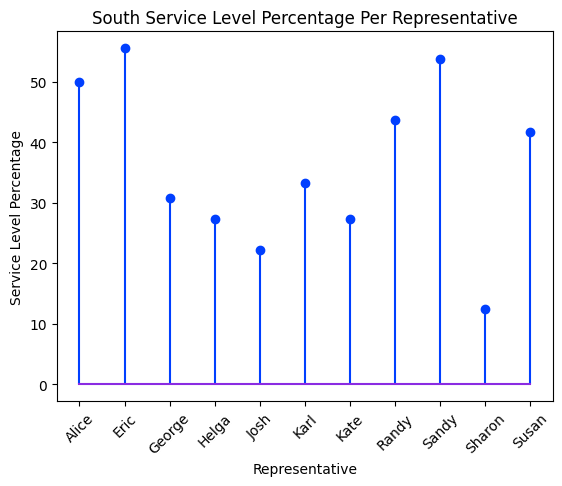

In [471]:
#Chart for above data
plt.stem(service_lvl_1.index, service_lvl_1['Service Level %'])
plt.title('South Service Level Percentage Per Representative')
plt.xticks(rotation=45)
plt.xlabel('Representative')
plt.ylabel('Service Level Percentage')
plt.savefig('lollipop2.png')
plt.show()

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: I used a grouped bar chart so that the differences in incoming and outgoing can be compared against the call purposes.

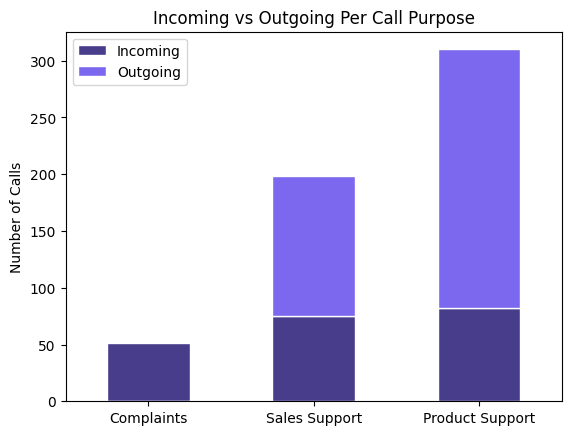

In [1054]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
# print(purpose_counts)

# print(purpose_ct)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:

com_cts = pd.DataFrame(complaints, index=["Complaints"])
sales_cts = pd.DataFrame(sales_support, index=["Sales Support"])
product_cts = pd.DataFrame(product_support, index=["Product Support"])

purpose_cts = pd.concat([com_cts, sales_cts, product_cts], axis=0)
purpose_cts

colors_2 = ("darkslateblue", "mediumslateblue")
purpose_cts.plot.bar(stacked=True, 
                     edgecolor = 'white', color=colors_2)
plt.xticks(rotation=0)
plt.title("Incoming vs Outgoing Per Call Purpose")
plt.ylabel("Number of Calls")
plt.savefig('groupedbar.png')


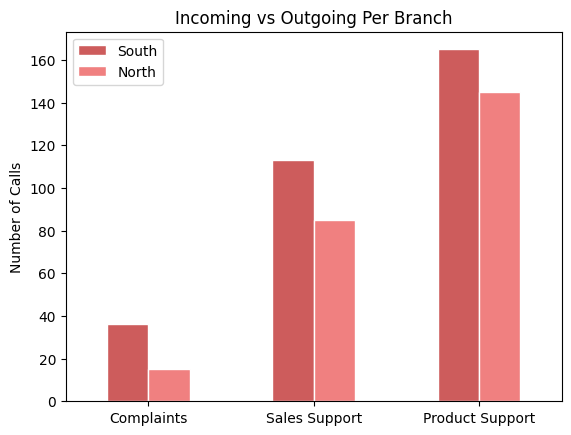

In [1067]:
#Chart for each call purpose per branch (coding above: 1 - under EDA section)
colors_2 = ("indianred", "lightcoral")
call_cts5.plot.bar(edgecolor = 'white', color=colors_2)
plt.title("Incoming vs Outgoing Per Branch")
plt.xticks(rotation=0)
plt.ylabel("Number of Calls")
plt.savefig('groupedbar2.png')

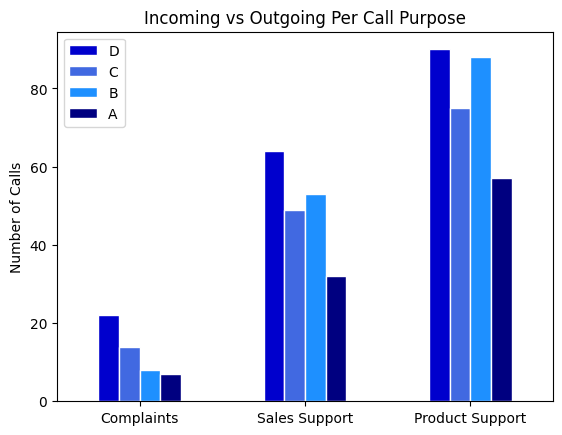

In [1062]:
#Chart for each call purpose per queue (coding above: 2 - under EDA section)
colors_2 = ("mediumblue", "royalblue", "dodgerblue", "navy")
que_purp10.plot.bar(edgecolor = 'white', color=colors_2)
plt.title("Incoming vs Outgoing Per Call Purpose")
plt.xticks(rotation=0)
plt.ylabel("Number of Calls")
plt.savefig('groupedbar3.png')

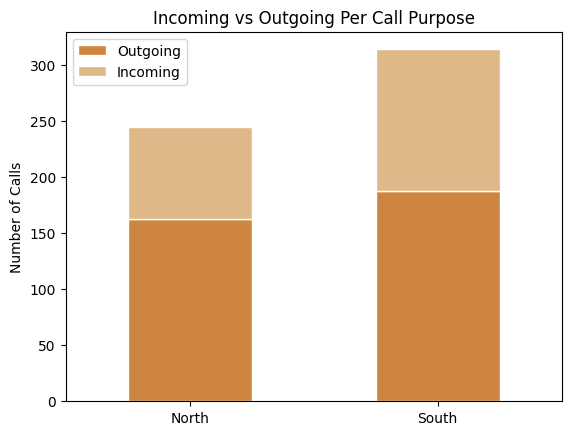

In [1070]:
#Chart for incoming vs outgoing per Center (coding above: 3 - under EDA)
colors_2 = ("peru", "burlywood")
n_s_df.plot.bar(stacked=True, edgecolor = 'white', color=colors_2)
plt.title("Incoming vs Outgoing Per Call Purpose")
plt.xticks(rotation=0)
plt.ylabel("Number of Calls")
plt.savefig('groupedbar4.png')

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: The South Branch is operating more efficiently. The branch has two representatives more than the North Branch while taking more calls at 314 in total. The call abandonment rates for queue C and D only assigned to this center are lower at .024. They also have higher service level percentages.

#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: The North Branch would benefit from extra help. They have two less representatives than the South Branch. The abandonment rates in the two queues, A and B, are higher by .061. They have lower service level percentages in comparison to the number of calls that the representatives answer and make. 


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: I wish I would have had more complete data for the Incoming Wait Times since some much was missing, the data was more skewed once the mean was imputed. Although this information could be coded to determine to see, I wish there had been more information about if the queues and call purposes were sorted or at assigned at random so that efficiency could be more quickly assessed.

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: The line chart is the chart I have chosen to plot out the number of calls for Sales Support in each time block because it allows the viewer to see how the call volume changes in each time blocks.

In [803]:
# Create your Bonus Mission visualization here!
# Use groupby to plot based on time blocks
# Use groupby and get_group to select which call purpose to plot:

#Created main data for line chart
time12 = df.groupby("Call Purpose").get_group("Sales Support")

time10 = time12.groupby("Time Block")["Call Purpose"].value_counts()
time10

Time Block  Call Purpose 
10:00 AM    Sales Support    73
11:00 AM    Sales Support    27
12:00 PM    Sales Support    49
1:00 PM     Sales Support    18
2:00 PM     Sales Support    10
3:00 PM     Sales Support     6
4:00 PM     Sales Support    10
5:00 PM     Sales Support     5
Name: Call Purpose, dtype: int64

In [1006]:
#Creating list for x-axis values
time45 = df.groupby("Call Purpose").get_group("Sales Support")
time47 = time45.groupby("Time Block")["Call Purpose"].value_counts()
time49 = time47.droplevel(1)
time_lst = time49.index.tolist()
time_lst

['10:00 AM',
 '11:00 AM',
 '12:00 PM',
 '1:00 PM',
 '2:00 PM',
 '3:00 PM',
 '4:00 PM',
 '5:00 PM']

In [923]:
#Creating list for y-axis values
lst = list(time10.values)
lst

[73, 27, 49, 18, 10, 6, 10, 5]

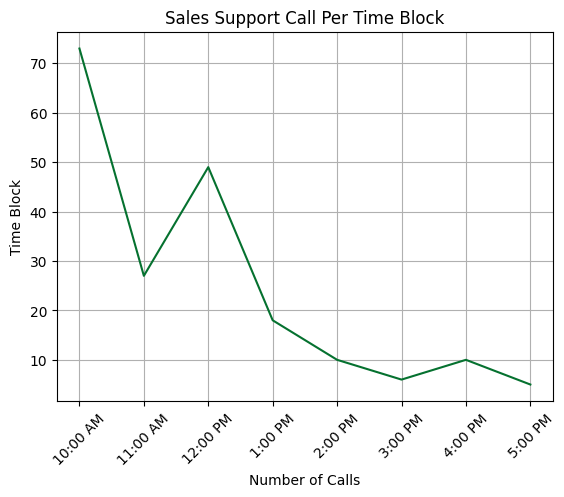

In [1115]:
#Created line chart for number of for Sales Support per time block
sns.lineplot(data=time10, x=time_lst, y=lst)
plt.grid()
plt.xticks(rotation=45)
plt.xlabel("Number of Calls")
plt.ylabel("Time Block")
plt.title('Sales Support Call Per Time Block')
plt.show()

In [776]:
##Coding suggestion from TA -- Kept for future reference ######
# get unique list of times in time block
# empty list for each call purpose

# for each time in time list, get subset of dataframe where 'time block' = time

# get subset of that dataframe where call purpose = each call purpose
# sum calls, append to empty list for each call purpose

# turn into a dataframe